In [72]:
import pandas as pd
import numpy as np


In [73]:
df=pd.read_excel('Gapminder_key_2.xlsx')

In [74]:
df

,country,year,life_exp,gdp_cap
0,Afghanistan,1952,28.801,779.445314
1,Afghanistan,1957,30.332,820.853030
2,Afghanistan,1962,31.997,853.100710
3,Afghanistan,1967,34.020,836.197138
4,Afghanistan,1972,36.088,739.981106
...,...,...,...,...
1699,Zimbabwe,1987,62.351,706.157306
1700,Zimbabwe,1992,60.377,693.420786
1701,Zimbabwe,1997,46.809,792.449960
1702,Zimbabwe,2002,39.989,672.038623


In [75]:
df1=pd.read_excel('Gapminder_key_1.xlsx')

In [76]:
df1

,country,year,population,continent
0,Afghanistan,1952,8425333,Asia
1,Afghanistan,1957,9240934,Asia
2,Afghanistan,1962,10267083,Asia
3,Afghanistan,1967,11537966,Asia
4,Afghanistan,1972,13079460,Asia
...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa
1700,Zimbabwe,1992,10704340,Africa
1701,Zimbabwe,1997,11404948,Africa
1702,Zimbabwe,2002,11926563,Africa


In [77]:
res=pd.merge(df,df1,on=["country","year"])

In [78]:
res

,country,year,life_exp,gdp_cap,population,continent
0,Afghanistan,1952,28.801,779.445314,8425333,Asia
1,Afghanistan,1957,30.332,820.853030,9240934,Asia
2,Afghanistan,1962,31.997,853.100710,10267083,Asia
3,Afghanistan,1967,34.020,836.197138,11537966,Asia
4,Afghanistan,1972,36.088,739.981106,13079460,Asia
...,...,...,...,...,...,...
1699,Zimbabwe,1987,62.351,706.157306,9216418,Africa
1700,Zimbabwe,1992,60.377,693.420786,10704340,Africa
1701,Zimbabwe,1997,46.809,792.449960,11404948,Africa
1702,Zimbabwe,2002,39.989,672.038623,11926563,Africa


## Standard Deviation of life Expectancy

In [79]:
answer= res['life_exp'].std()

In [80]:
answer

12.917107415241187

## Mean of Gdp_Cap

In [81]:
mean_gdp=res['gdp_cap'].mean()

In [82]:
mean_gdp

7215.327081212142

## Datatype of each column and missing values

In [83]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   life_exp    1704 non-null   float64
 3   gdp_cap     1704 non-null   float64
 4   population  1704 non-null   int64  
 5   continent   1704 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 93.2+ KB


## conversion of object datatype to categorical

In [84]:
res=res.astype({"country":'category',"continent":'category'})

In [85]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     1704 non-null   category
 1   year        1704 non-null   int64   
 2   life_exp    1704 non-null   float64 
 3   gdp_cap     1704 non-null   float64 
 4   population  1704 non-null   int64   
 5   continent   1704 non-null   category
dtypes: category(2), float64(2), int64(2)
memory usage: 76.9 KB


## Number of countries

In [86]:
n=pd.unique(res['country'])

In [87]:
n

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', ..., 'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']
Length: 142
Categories (142, object): ['Afghanistan', 'Albania', 'Algeria', 'Angola', ..., 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']

## Function to drop duplicates

In [88]:
res.drop_duplicates('country')
res['country'].count                  

<bound method Series.count of 0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: category
Categories (142, object): ['Afghanistan', 'Albania', 'Algeria', 'Angola', ..., 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']>

## Which country has lowest life expectancy in year 2007

In [91]:
m=res[res['year'] == 2007]
m[m.life_exp == m.life_exp.min()]

,country,year,life_exp,gdp_cap,population,continent
1463,Swaziland,2007,39.613,4513.480643,1133066,Africa


## Which  country has the highest GDP in year 2007

In [93]:
m['GDP']=m['gdp_cap']*m['population']

<ipython-input-93-09a7dd0de1ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m['GDP']=m['gdp_cap']*m['population']


In [94]:
m.head()

,country,year,life_exp,gdp_cap,population,continent,GDP
11,Afghanistan,2007,43.828,974.580338,31889923,Asia,3.107929e+10
23,Albania,2007,76.423,5937.029526,3600523,Europe,2.137641e+10
35,Algeria,2007,72.301,6223.367465,33333216,Africa,2.074449e+11
47,Angola,2007,42.731,4797.231267,12420476,Africa,5.958390e+10
59,Argentina,2007,75.320,12779.379640,40301927,Americas,5.150336e+11


In [95]:
m[m.GDP==m.GDP.max()]

,country,year,life_exp,gdp_cap,population,continent,GDP
1619,United States,2007,78.242,42951.65309,301139947,Americas,1.293446e+13


## Change in trend from 1952 to 2007 in life expectancy52

<AxesSubplot:xlabel='year', ylabel='life_exp'>

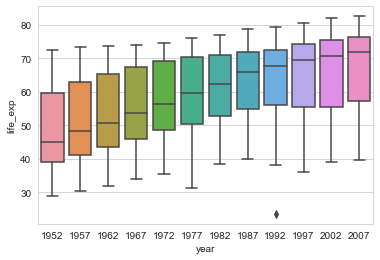

In [100]:
import seaborn as sns
sns.set_style("whitegrid")
sns.boxplot(x='year',y="life_exp", data=res)

## Which Continent has the lowest life Expectancy?

<AxesSubplot:xlabel='continent', ylabel='life_exp'>

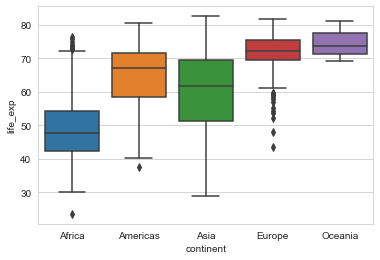

In [105]:
sns.boxplot(x='continent',y="life_exp", data=res)

Africa has lowest life expectancy

## Average life expectancy,GDP of year 2007

In [111]:
m=res[res['year'] == 2007]
m.life_exp.mean()


67.00742253521126

In [113]:
res['GDP']=res.gdp_cap*res.population
res

,country,year,life_exp,gdp_cap,population,continent,GDP
0,Afghanistan,1952,28.801,779.445314,8425333,Asia,6.567086e+09
1,Afghanistan,1957,30.332,820.853030,9240934,Asia,7.585449e+09
2,Afghanistan,1962,31.997,853.100710,10267083,Asia,8.758856e+09
3,Afghanistan,1967,34.020,836.197138,11537966,Asia,9.648014e+09
4,Afghanistan,1972,36.088,739.981106,13079460,Asia,9.678553e+09
...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,62.351,706.157306,9216418,Africa,6.508241e+09
1700,Zimbabwe,1992,60.377,693.420786,10704340,Africa,7.422612e+09
1701,Zimbabwe,1997,46.809,792.449960,11404948,Africa,9.037851e+09
1702,Zimbabwe,2002,39.989,672.038623,11926563,Africa,8.015111e+09


In [115]:
m=res[res['year'] == 2007]
m.GDP.mean()

409220666999.3278

In [117]:
m.describe()

,year,life_exp,gdp_cap,population,GDP
count,142.0,142.000000,142.000000,1.420000e+02,1.420000e+02
mean,2007.0,67.007423,11680.071820,4.402122e+07,4.092207e+11
std,0.0,12.073021,12859.937337,1.476214e+08,1.311852e+12
min,2007.0,39.613000,277.551859,1.995790e+05,3.190141e+08
25%,2007.0,57.160250,1624.842248,4.508034e+06,1.743849e+10
50%,2007.0,71.935500,6124.371108,1.051753e+07,5.786906e+10
75%,2007.0,76.413250,18008.835640,3.121004e+07,2.759600e+11
max,2007.0,82.603000,49357.190170,1.318683e+09,1.293446e+13


## Is there any relationship between life expectancy and GDP per captita . If Yes How?


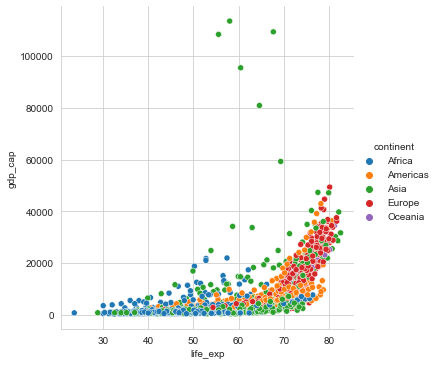

In [119]:
sns.relplot(x='life_exp',y="gdp_cap", data=res,hue='continent')

## What is the trend of life expectancy in India from 1952 to 2007

C:\Users\Neha Mehlawat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='life_exp'>

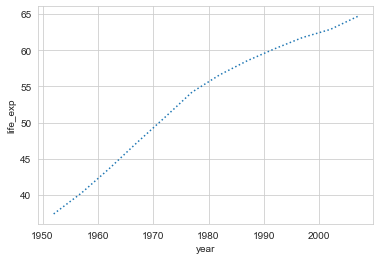

In [123]:

m=res[res['country'] == 'India']
x=m.year
y=m.life_exp
sns.lineplot(x,y,linestyle="dotted")

## What is the trend of gdp_cap in India from 1952 to 2007

C:\Users\Neha Mehlawat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='gdp_cap'>

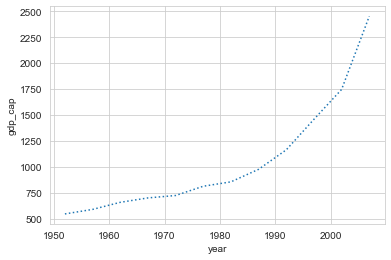

In [124]:

m=res[res['country'] == 'India']
x=m.year
y=m.gdp_cap
sns.lineplot(x,y,linestyle="dotted")

## what is the mean age of each continent by year?

In [125]:
r=res.groupby(by=['year','continent'])['life_exp'].mean()
r=pd.DataFrame(r)

In [126]:
r

life_exp
year continent           
1952 Africa     39.135500
     Americas   53.279840
     Asia       46.314394
     Europe     64.408500
     Oceania    69.255000
1957 Africa     41.266346
     Americas   55.960280
     Asia       49.318544
     Europe     66.703067
     Oceania    70.295000
1962 Africa     43.319442
     Americas   58.398760
     Asia       51.563223
     Europe     68.539233
     Oceania    71.085000
1967 Africa     45.334538
     Americas   60.410920
     Asia       54.663640
     Europe     69.737600
     Oceania    71.310000
1972 Africa     47.450942
     Americas   62.394920
     Asia       57.319269
     Europe     70.775033
     Oceania    71.910000
1977 Africa     49.580423
     Americas   64.391560
     Asia       59.610556
     Europe     71.937767
     Oceania    72.855000
1982 Africa     51.592865
     Americas   66.228840
     Asia       62.617939
     Europe     72.806400
     Oceania    74.290000
1987 Africa     53.344788
     Americas   68.090720
     Asia       64.851182
     Europe     73.642167
     Oceania    75.320000
1992 Africa     53.629577
     Americas   69.568360
     Asia       66.537212
     Europe     74.440100
     Oceania    76.945000
1997 Africa     53.598269
     Americas   71.150480
     Asia       68.020515
     Europe     75.505167
     Oceania    78.190000
2002 Africa     53.325231
     Americas   72.422040
     Asia       69.233879
     Europe     76.700600
     Oceania    79.740000
2007 Africa     54.806038
     Americas   73.608120
     Asia       70.728485
     Europe     77.648600
     Oceania    80.719500

## what is the median age of each continent by year?

In [127]:
r=res.groupby(by=['year','continent'])['life_exp'].median()
r=pd.DataFrame(r)

In [128]:
r

life_exp
year continent          
1952 Africa      38.8330
     Americas    54.7450
     Asia        44.8690
     Europe      65.9000
     Oceania     69.2550
1957 Africa      40.5925
     Americas    56.0740
     Asia        48.2840
     Europe      67.6500
     Oceania     70.2950
1962 Africa      42.6305
     Americas    58.2990
     Asia        49.3250
     Europe      69.5250
     Oceania     71.0850
1967 Africa      44.6985
     Americas    60.5230
     Asia        53.6550
     Europe      70.6100
     Oceania     71.3100
1972 Africa      47.0315
     Americas    63.4410
     Asia        56.9500
     Europe      70.8850
     Oceania     71.9100
1977 Africa      49.2725
     Americas    66.3530
     Asia        60.7650
     Europe      72.3350
     Oceania     72.8550
1982 Africa      50.7560
     Americas    67.4050
     Asia        63.7390
     Europe      73.4900
     Oceania     74.2900
1987 Africa      51.6395
     Americas    69.4980
     Asia        66.2950
     Europe      74.8150
     Oceania     75.3200
1992 Africa      52.4290
     Americas    69.8620
     Asia        68.6900
     Europe      75.4510
     Oceania     76.9450
1997 Africa      52.7590
     Americas    72.1460
     Asia        70.2650
     Europe      76.1160
     Oceania     78.1900
2002 Africa      51.2355
     Americas    72.0470
     Asia        71.0280
     Europe      77.5365
     Oceania     79.7400
2007 Africa      52.9265
     Americas    72.8990
     Asia        72.3960
     Europe      78.6085
     Oceania     80.7195